In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [26]:
data = pd.read_csv("Yes_Bank_Training.csv", low_memory=False)
test = pd.read_csv("Yes_Bank_Test.csv", low_memory=False)

In [3]:
data.drop(columns="serial_number", inplace=True)

In [4]:
data.head()

age_in_years job_description marital_status education_details has_default  \
0            58      management        married          tertiary          no   
1            44      technician         single         secondary          no   
2            33    entrepreneur        married         secondary          no   
3            47     blue-collar        married           unknown          no   
4            33         unknown         single           unknown          no   

   balance_in_account housing_status previous_loan phone_type  date  \
0                2143            yes            no    unknown     5   
1                  29            yes            no    unknown     5   
2                   2            yes           yes    unknown     5   
3                1506            yes            no    unknown     5   
4                   1             no            no    unknown     5   

  month_of_year  call_duration  campaign_contacts  days_passed  \
0           may            261                  1           -1   
1           may            151                  1           -1   
2           may             76                  1           -1   
3           may             92                  1           -1   
4           may            198                  1           -1   

   previous_contact poutcome_of_campaign outcome  
0                 0              unknown      no  
1                 0              unknown      no  
2                 0              unknown      no  
3                 0              unknown      no  
4                 0              unknown      no

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31649 entries, 0 to 31648
Data columns (total 17 columns):
age_in_years            31649 non-null int64
job_description         31649 non-null object
marital_status          31649 non-null object
education_details       31649 non-null object
has_default             31649 non-null object
balance_in_account      31649 non-null int64
housing_status          31649 non-null object
previous_loan           31649 non-null object
phone_type              31649 non-null object
date                    31649 non-null int64
month_of_year           31649 non-null object
call_duration           31649 non-null int64
campaign_contacts       31649 non-null int64
days_passed             31649 non-null int64
previous_contact        31649 non-null int64
poutcome_of_campaign    31649 non-null object
outcome                 31649 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [6]:
data.columns

Index(['age_in_years', 'job_description', 'marital_status',
       'education_details', 'has_default', 'balance_in_account',
       'housing_status', 'previous_loan', 'phone_type', 'date',
       'month_of_year', 'call_duration', 'campaign_contacts', 'days_passed',
       'previous_contact', 'poutcome_of_campaign', 'outcome'],
      dtype='object')

In [7]:
data.describe()

age_in_years  balance_in_account          date  call_duration  \
count  31649.000000        31649.000000  31649.000000   31649.000000   
mean      41.111820         1293.382540     16.597997     252.408196   
std        9.597652         2961.185138      8.586414     262.344981   
min       19.000000        -8019.000000      1.000000       0.000000   
25%       33.000000           47.000000      9.000000      98.000000   
50%       40.000000          397.000000     18.000000     171.000000   
75%       49.000000         1328.000000     23.000000     305.000000   
max       94.000000        98417.000000     31.000000    4918.000000   

       campaign_contacts   days_passed  previous_contact  
count       31649.000000  31649.000000      31649.000000  
mean            3.062372     10.819931          0.208537  
std             3.510245     48.086849          1.946336  
min             1.000000     -1.000000          0.000000  
25%             1.000000     -1.000000          0.000000  
50%             2.000000     -1.000000          0.000000  
75%             3.000000     -1.000000          0.000000  
max            63.000000    335.000000        275.000000

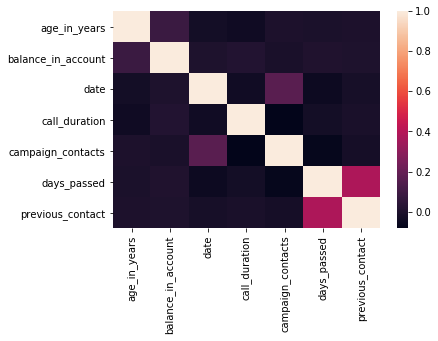

In [8]:

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
# Checking if skewed
data["outcome"].value_counts(normalize=True)*100

no     94.18623
yes     5.81377
Name: outcome, dtype: float64

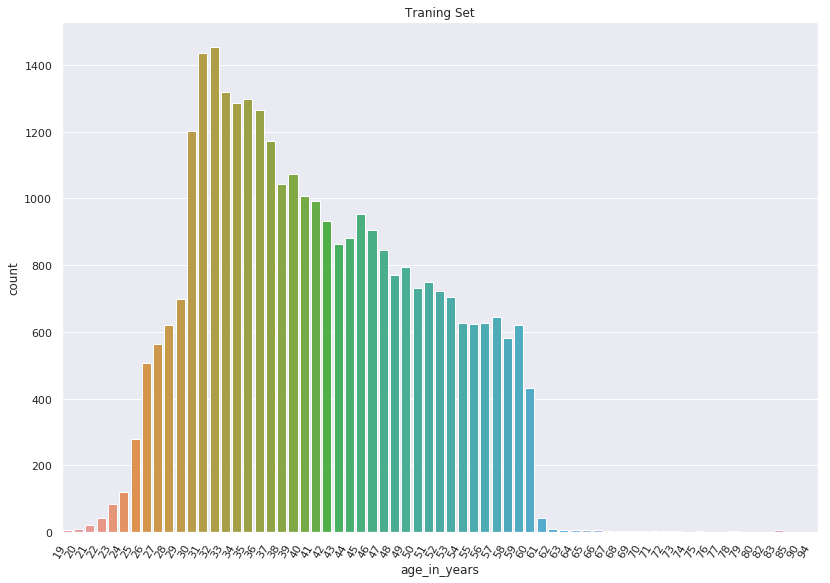

In [10]:
# Resizing the sns plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

agePlot = sns.countplot(x="age_in_years", data=data)
agePlot.set_title("Traning Set")

# To tilt the damn x labels
agePlot.set_xticklabels(agePlot.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

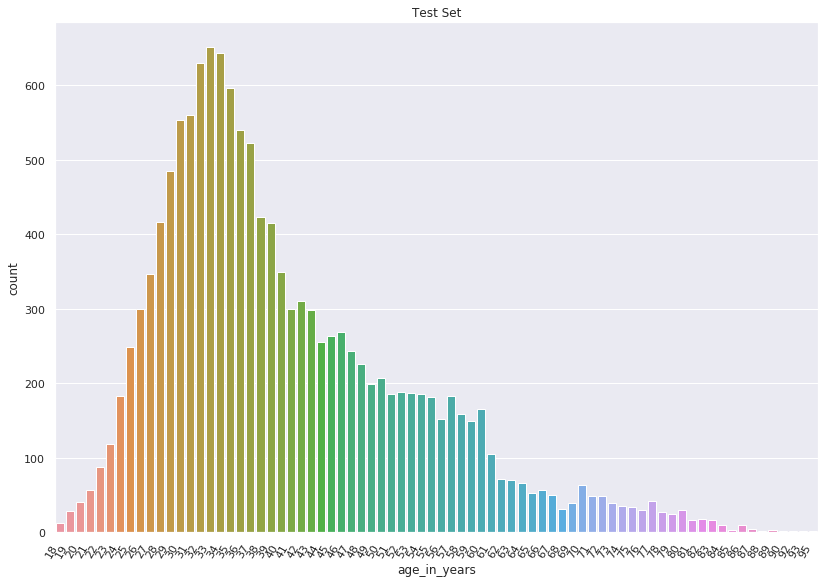

In [11]:
agePlot = sns.countplot(x="age_in_years", data=test);
agePlot.set_title("Test Set")

# To tilt the damn x labels
agePlot.set_xticklabels(agePlot.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### A glimpse at data distributions for categorical features for training and test


In [12]:
def catAnal(train, test, col):
    '''Get the normalized value counts for categorical vars'''
    dataCount = (data[col].value_counts(normalize=True)*100).sort_values(ascending=False)
    colOrder = dataCount.index
    trainVals = dataCount.values
    testVals = (test[col].value_counts(normalize=True)*100)[colOrder].values
    
    print(col)

#     making the output look pretty
    print("CATEGORY\tTRAIN\tTEST")
    for i in range(len(colOrder)):
        print("{:<15}{:^8.2f}{:>8.2f}".format(colOrder[i], trainVals[i], testVals[i]))

In [13]:
notCatFeatures = ["age_in_years", "balance_in_account"
                  , "call_duration", "campaign_contacts", "days_passed"
                 , "previous_contact", "outcome", "date"]

catFeatures = [col for col in data.columns if col not in notCatFeatures]

In [14]:
for colName in catFeatures:
    catAnal(data, test, colName)
    print("\n")

job_description
CATEGORY	TRAIN	TEST
blue-collar     21.95     20.53
management      21.19     20.30
technician      17.96     14.11
admin.          10.60     13.40
services         9.37      8.77
retired          3.89      7.61
self-employed    3.68      3.06
entrepreneur     3.67      2.41
housemaid        3.06      2.00
unemployed       3.00      2.60
student          0.94      4.73
unknown          0.70      0.49


marital_status
CATEGORY	TRAIN	TEST
married         62.51     54.79
single          25.49     34.83
divorced        12.00     10.38


education_details
CATEGORY	TRAIN	TEST
secondary       51.51     50.87
tertiary        28.74     31.00
primary         15.73     13.82
unknown          4.02      4.31


has_default
CATEGORY	TRAIN	TEST
no              97.71     99.33
yes              2.29      0.67


housing_status
CATEGORY	TRAIN	TEST
yes             54.44     58.25
no              45.56     41.75


previous_loan
CATEGORY	TRAIN	TEST
no              81.67     89.37
yes         

Takeaways:
    - test set more normally distributed, i.e., more student and retirees
    - more "cellular" phone_type
    - different poutcome_campaign

### Looking at data["outcome"] == "yes" for some intuition

In [15]:
rowSelection = (data["outcome"] == "yes")
yesBoss = data.loc[rowSelection]

In [16]:
yesBoss.describe()

age_in_years  balance_in_account         date  call_duration  \
count   1840.000000         1840.000000  1840.000000    1840.000000   
mean      40.492935         1599.818478    15.869022     755.892935   
std       10.784908         2949.747091     8.405164     457.867966   
min       19.000000        -1129.000000     1.000000       8.000000   
25%       32.000000          127.000000     8.000000     458.750000   
50%       39.000000          622.000000    17.000000     698.500000   
75%       48.000000         1807.250000    21.000000     993.250000   
max       90.000000        45248.000000    31.000000    3881.000000   

       campaign_contacts  days_passed  previous_contact  
count        1840.000000  1840.000000       1840.000000  
mean            2.726630     7.746739          0.159783  
std             2.659537    40.252155          1.090027  
min             1.000000    -1.000000          0.000000  
25%             1.000000    -1.000000          0.000000  
50%             2.000000    -1.000000          0.000000  
75%             3.000000    -1.000000          0.000000  
max            32.000000   307.000000         29.000000

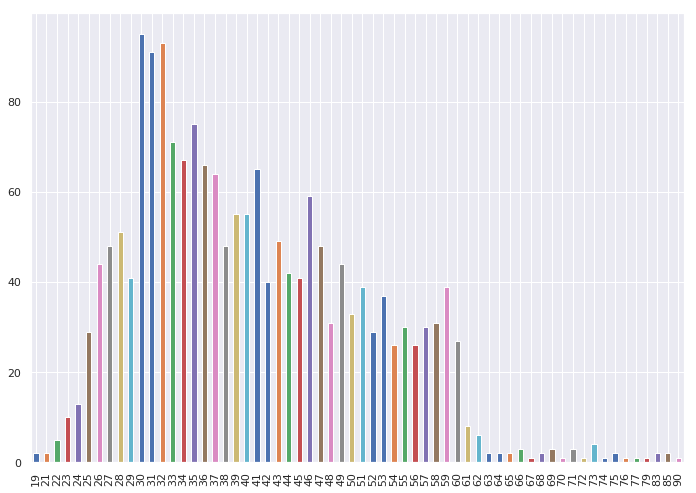

In [17]:
# Plotting to see if there's any correlation with age and outcome
yesBoss["age_in_years"].value_counts().sort_index().plot.bar();

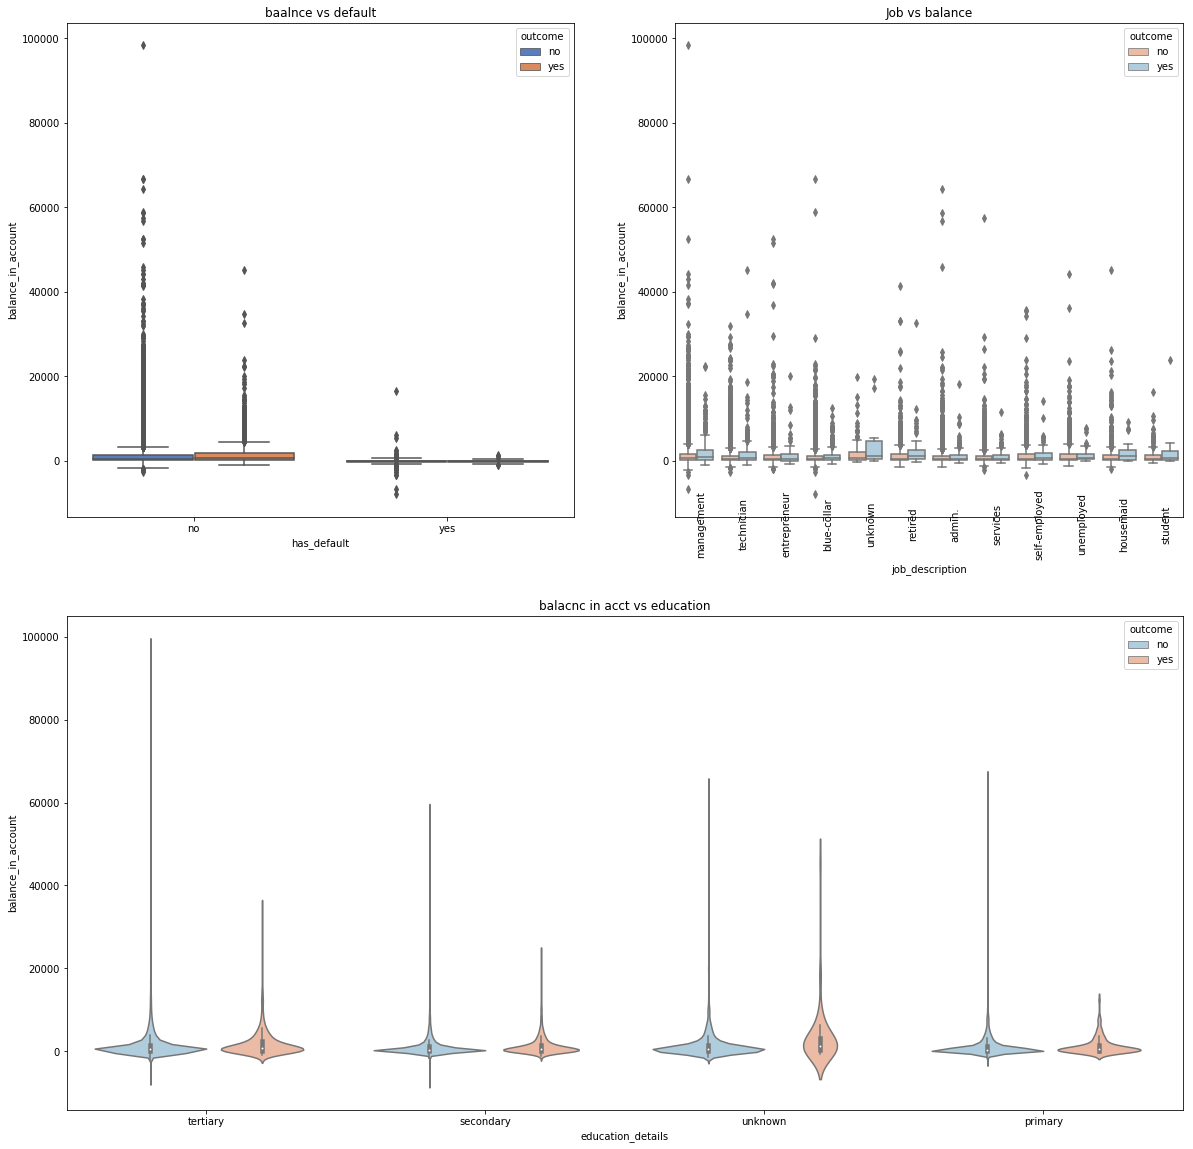

In [8]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="has_default", y="balance_in_account", hue="outcome",
                    data=data, palette="muted", ax=ax1)

g.set_title("baalnce vs default")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job_description", y="balance_in_account", hue="outcome",
                 data=data, palette="RdBu", ax=ax2)

g1.set_xticklabels(data["job_description"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Job vs balance")

g2 = sns.violinplot(data=data, x="education_details", y="balance_in_account", hue="outcome", palette="RdBu_r")

g2.set_title("balacnc in acct vs education")


plt.show()


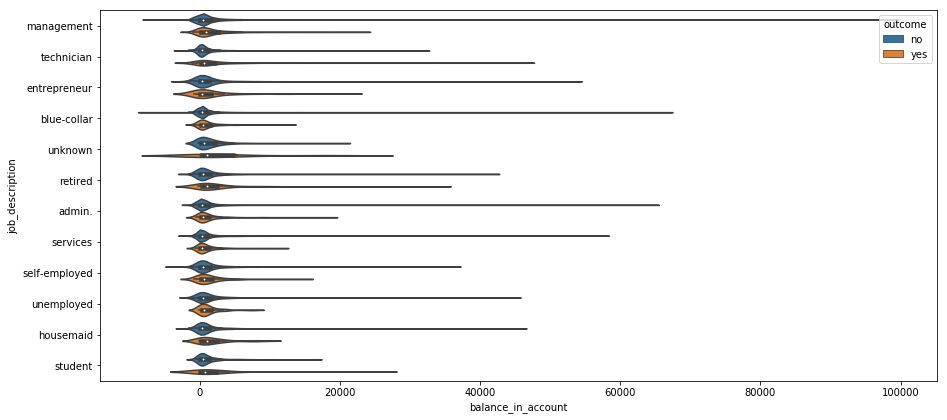

In [30]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(212)

g3=sns.violinplot(x="balance_in_account", y="job_description", hue="outcome", data=data)

g2.set_title("job vs balance")


plt.show()